<a href="https://colab.research.google.com/github/keranrong/MITBrain_DeepLearningTutorial/blob/master/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting Started

**Authors:** Yen-Ling Kuo and Eugenio Piasini for the [Brains, Minds and Machines summer course 2018](http://cbmm.mit.edu/summer-school/2018).




This is the hands-on deep learning tutorial series for Brains, Minds, and Machines summer course. The tutorial will guide you to implement a multi-layer perceptron using numpy and get familiar with the basic construct of PyTorch. If you are familiar with these topics, feel free to jump to the exercise section at the end or go to other modules.

*  [Convolution Neural Network](https://colab.research.google.com/drive/1_QVMpGNXRzjU-n0beoHmmoxjGig8v94C)
*  [Transfer Learning](https://colab.research.google.com/drive/15exgMLrj7azSMQeKXBYwuHZAdJdCQloh)
*  [Recurrent Neural Network](https://colab.research.google.com/drive/1jR_DGoVDcxZ104onxTk2C7YeV7vTt1DV)

## Implementing a Multi-layer Perceptron

### XOr Problem

The XOr (exclusive or) problem is a classical probem in artificial neural network research. It uses a neural network to predict the output of a XOr logic gate given two binary inputs.

Here, we relax the XOr problem a bit. Instead of binary inputs, we give inputs in real values. When the two input values have the same sign, the network should output 1; otherwise, the network should output 0.

This is how the training data looks like in a 2D plot. The red dot means the output label is 0, the blue dot means the output label is 1.

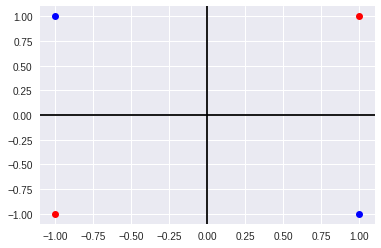

In [0]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# input of the MLP
X = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
# output of the MLP
y = np.array([[0], [1], [0], [1]])

# plot the training data
fig, ax = plt.subplots()
for i in range(y.shape[0]):
  if y[i][0] == 0:
    marker = 'ro'
  else:
    marker = 'bo'
  ax.plot(X[i][0], X[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

Clearly, these data points are not linearly separable. We can not find one single line to classify the points correctly.

In this part, we will build a multi-layer perceptron with nonlinearity to make predictions.

### Implementing Activation Functions

There are several activation functions to choose from, including sigmoid, tanh, relu, etc. Here, we implemented the sigmoid function as an example. In order to do backpropagation, we need to implement its derivative as well.

In [0]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def derivative_sigmoid(x):
    return x * (1 - x)

### A Simple MLP Architecture

We design a simple MLP to solve this problem. The MLP consists of a hidden layer and an output layer to map the hidden vector to the output values. 

First, we initialize the weight and bias of each layer as well as the training epoch and learning rate. 

In [0]:
epoch = 5000 # number of training iterations
learning_rate = 0.1

# dimension of each layer
d_in = X.shape[1] # number of features in the input dataset
d_h = 3   # hidden layer
d_out = 1 # output layer

# weight and bias initialization
wh = np.random.uniform(size=(d_in, d_h))
bh = np.random.uniform(size=(1, d_h))
wout = np.random.uniform(size=(d_h, d_out))
bout = np.random.uniform(size=(1, d_out))

For each training iteration, we run one forward pass to get the predicted value and compute the loss between the prediction and the real value. For simplicity, we use the differences between the two values as the loss function. Then, we can compute the gradients and finally update the weights and biases.

In [0]:
for i in range(epoch):
    # Forward pass
    h = sigmoid(X.dot(wh) + bh)
    y_pred = sigmoid(h.dot(wout) + bout)
    
    # Compute and print loss
    loss = (y_pred - y).sum()
    if i % 500 == 0:
        print('Epoch', i, ':', loss)

    # Backpropagation to compute gradients
    grad_y_pred = (y - y_pred) * derivative_sigmoid(y_pred)
    grad_wout = h.T.dot(grad_y_pred)
    grad_bout = np.sum(grad_y_pred, axis=0, keepdims=True)
    grad_h = grad_y_pred.dot(wout.T) * derivative_sigmoid(h)
    grad_wh = X.T.dot(grad_h)
    grad_bh = np.sum(grad_h, axis=0, keepdims=True)

    # Update weights and biases
    wout += grad_wout * learning_rate
    bout += grad_bout * learning_rate
    wh += grad_wh * learning_rate
    bh += grad_bh * learning_rate
    
print('Prediction of training data:')
print(y_pred)

Epoch 0 : 1.0434065765915648
Epoch 500 : 0.005132341091276804
Epoch 1000 : 0.007237810333915795
Epoch 1500 : 0.018516013578097512
Epoch 2000 : 0.05017020251491022
Epoch 2500 : 0.02252450245470422
Epoch 3000 : 0.024550407887971692
Epoch 3500 : 0.01985056306238825
Epoch 4000 : 0.016307926030648998
Epoch 4500 : 0.013871609465979373
Prediction of training data:
[[0.07657822]
 [0.92465901]
 [0.08418696]
 [0.92670571]]


The predicted values are very close to the labels in the training data. Since they are real values, to get the binary output, we can simply threshold the output to decide which label we want to assign.

Although it is possible to implement any kind of layers and optmization methods with numpy, there are several machine learning libraries available. So, it is easier to build neural networks of different architectures.

TensorFlow, PyTorch, Keras, MxNet, Caffe, Theano are all popular deep learning framework. We will focus on PyTorch in the following tutorials.


## Introducing PyTorch

PyTorch is an open source library for numerical computation using  computation graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. 


Similar to python programming, we can add and execute a node to the computation graph immediately. This property makes it easy to debug the code and inspect the values in the network.



In [0]:
!pip3 install torch

PyTorch provides several useful modules.

*  [ ```torch.nn```](https://pytorch.org/docs/stable/nn.html): This module provides the building blocks to create the networks, including the implementation of the various layers. 
*  [```torch.optim```](https://pytorch.org/docs/stable/optim.html): This module provides various optimization algorithms. Most commonly used methods are already supported.



In [0]:
import torch
import torch.nn as nn

### Tensors

Tensors are the leaf variables in the computation graph. By default, a tensor is initialized randomly. 

You can perform the operations defined in [```torch.Tensor```](https://pytorch.org/docs/stable/tensors.html) on the tensors.

In [0]:
A = torch.Tensor(5, 3)
B = torch.rand(5, 3)

print(A)
print(B)
print(A + B)
print(torch.add(A, B))

tensor([[4.9291e-36, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.3733e-14, 6.4069e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28],
        [3.8016e-39, 8.3383e-10, 0.0000e+00]])
tensor([[0.9762, 0.6550, 0.8054],
        [0.3523, 0.0591, 0.1281],
        [0.8579, 0.9648, 0.2046],
        [0.5063, 0.7308, 0.1397],
        [0.0565, 0.2522, 0.5584]])
tensor([[9.7622e-01, 6.5504e-01, 8.0541e-01],
        [3.5234e-01,        nan, 1.2808e-01],
        [8.5788e-01, 6.4165e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28],
        [5.6543e-02, 2.5221e-01, 5.5841e-01]])
tensor([[9.7622e-01, 6.5504e-01, 8.0541e-01],
        [3.5234e-01,        nan, 1.2808e-01],
        [8.5788e-01, 6.4165e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28],
        [5.6543e-02, 2.5221e-01, 5.5841e-01]])


### Numpy Bridge

You can convert a tensor to a numpy array easily and vice versa. The torch Tensor and numpy array will share their underlying memory locations, and changing one will change the value of the other.

In [0]:
# convert pytorch tensor to numpy
a = torch.ones(5)
print(a.numpy())
a.numpy()[1] = 2
print(a)

# convert numpy to pytorch tensor
b = np.ones(5)
print(torch.from_numpy(b))

[1. 1. 1. 1. 1.]
tensor([1., 2., 1., 1., 1.])
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


### Computing Gradient with Autograd

PyTorch uses a technique called automatic differentiation. That is, we have a recorder that records what operations we have performed, and then it replays it backward to compute our gradients. This technique is especially powerful when building neural networks, as we save time on one epoch by calculating differentiation of the parameters at the forward pass itself.

Once you finish your computation in the forward pass, you can call ```.backward()``` and have all the gradients computed automatically. You can access the gradient w.r.t. this tensor in ```.grad```.

In [0]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x * 2
print(y)
out = y.mean()

# compute gradients
out.backward()
# print gradients d(out)/dx
print(x.grad.data)

tensor([-0.4563, -0.8237, -0.5198], requires_grad=True)
tensor([-0.9126, -1.6473, -1.0397], grad_fn=<MulBackward>)
tensor([0.6667, 0.6667, 0.6667])


### Using GPU

To train on the GPU, we need to move all tensors and layers to the GPU first. You can do this by calling ```.cuda()``` or create a tensor with a device location. If you have multiple GPUs, you can select which GPU you want to use by setting ```cuda:n``` where n is the device id of the GPU. 

In [0]:
# move tensor to GPU
if torch.cuda.is_available():
    a = a.cuda()
    print(a)
    x = torch.randn(2, 3, device=torch.device("cuda:0"))
    print(x)

# move back to CPU
a = a.cpu()
print(a)
x = torch.randn(2, 3, device=torch.device("cpu"))
print(x)

tensor([1., 2., 1., 1., 1.], device='cuda:0')
tensor([[ 0.7474, -0.4061,  1.5934],
        [ 1.6632,  0.0018,  0.7008]], device='cuda:0')
tensor([1., 2., 1., 1., 1.])
tensor([[-0.0331,  1.8443,  0.7673],
        [-2.3190,  1.1860, -0.2020]])


### Building Model: Linear Regression

Now, we know how to do the basic computation using PyTorch. Let's start to build a simple linear regression model.

First, we generate 100 x, y data points for training. The data points follow this formula: y = 3.0 * x + 1.0

The goal is to regress W and b that fits the training data.

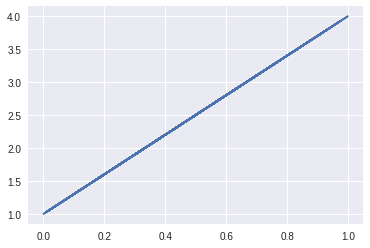

In [0]:
x_train = np.random.rand(100).astype(np.float32).reshape(-1,1)
y_correct = 3.0 * x_train + 1.0

plt.plot(x_train, y_correct)

A model in PyTorch is a subclass of ```nn.Module```. There are several predefined layers and containers in the [ ```torch.nn```](https://pytorch.org/docs/stable/nn.html) module. We can use those to build more complex network structures.

You can check out the layers we talked about in the lecture here:

*   [```nn.Linear```](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear): fully connected layer
*   [```nn.Conv2d```](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d): convolution layer
* [```nn.MaxPool2d```](https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d): pooling
* [```nn.LSTM```](https://pytorch.org/docs/stable/nn.html#torch.nn.LSTM): LSTM unit

More complex neural networks are easily built using the predefined layers with the container classes ```Sequential``` and ```Concat```. 

The main method to implement in the ```nn.Module``` is ```forward```. It computes the output of the model given the input Tensor. The computation we put here defines the network architecture and how data flows between layers.

A linear regression model is basically a single linear layer!

We first define the layers we needed in ```__init__``` and then build the computation in ```forward```.

In [0]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

We then instantiate the model for training. We will use the mean squared error ([`nn.MSELoss`](https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss)) as loss function and optimize the network with stochastic gradient descent ([`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD)).

We need to specify the parameters we want to optimize in the first argument of the selected optimizer. Usually, that should be all parameters in the model.

In [0]:
model = LinearRegressionModel(1, 1)

criterion = nn.MSELoss()
learing_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learing_rate)

epochs = 2000

Similar to what we did in the numpy example, at each training iteration, we perform one forward pass, get the loss, compute the gradients (using ```.backward()```), and update the parameters by taking a ```.step()``` with the optimizer.

**Note** that we need to clear the gradients that are accumulated from previous training iterations first so we don't optimize against the old gradients stored in the variables. We can easily do it by calling ```optimizer.zero_grad()``` at the beginning of each iteration. 

In [0]:
for epoch in range(epochs):
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_correct)

    optimizer.zero_grad()
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 7.82508659362793
epoch 100, loss 0.23652684688568115
epoch 200, loss 0.1393134593963623
epoch 300, loss 0.10546277463436127
epoch 400, loss 0.08004981279373169
epoch 500, loss 0.060762207955121994
epoch 600, loss 0.04612170159816742
epoch 700, loss 0.03500886261463165
epoch 800, loss 0.026573505252599716
epoch 900, loss 0.02017076313495636
epoch 1000, loss 0.015310725197196007
epoch 1100, loss 0.011621679179370403
epoch 1200, loss 0.00882150512188673
epoch 1300, loss 0.006696018390357494
epoch 1400, loss 0.005082668736577034
epoch 1500, loss 0.003858013777062297
epoch 1600, loss 0.0029284381307661533
epoch 1700, loss 0.0022228388115763664
epoch 1800, loss 0.0016872496344149113
epoch 1900, loss 0.0012807432794943452


After the model is trained, we can apply the ```forward``` method to get the prediction of any data point.

We can also visualize it to see what the predictions look like!

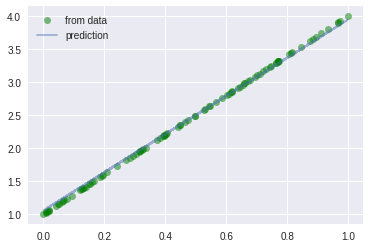

In [0]:
predicted = model.forward(torch.from_numpy(x_train)).data.numpy()

plt.plot(x_train, y_correct, 'go', label='from data', alpha=0.5)
plt.plot(x_train, predicted, label='prediction', alpha=0.5)
plt.legend()

In case anything goes wrong and you want to check the learned parameters of your model, you can inspect the `weight` and `bias` of a layer as follows. 

In [0]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[2.8933]], requires_grad=True)
Parameter containing:
tensor([1.0523], requires_grad=True)


### Exercise: Revisit the XOr Example

We just went through basic operations of PyTorch and learned how to build a simple model with it. Let's try to apply what we just learned to build the XOr classifier we talked about at the beginning of the tutorial.

This time, I give your more data points ranging between -10 and 10 for trainig.

In [0]:
import random
random.seed(1)

x_train = []
y_correct = []
for i in range(100):
    x0 = random.randint(-10, 10)
    x1 = random.randint(-10, 10)
    label = 0 if x0 * x1 > 0 else 1
    x_train.append([x0, x1])
    y_correct.append(label)
x_train = np.asarray(x_train)
y_correct = np.asarray(y_correct)

Now is your job to implement the structure of the classifier. You can use the architecture in our first example, which consists a hidden and an output linear layer.

To apply sigmoid function, you can use [`torch.sigmoid`](https://pytorch.org/docs/stable/torch.html#torch.sigmoid).

In [0]:
class XorClassifier(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(XorClassifier, self).__init__() 
        # TODO: please initialize the layers here


    def forward(self, x):
        # TODO: please build your forward pass here

        return out

Different from what we did before, we want to have our output layer to output two values to indicate the probability distribution over the two possible labels instead of one real value for the label. 

So, we set the output dimension to 2 and use cross entropy as loss function ([`nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss)) because it is useful when training a classification problem with N classes. Don't worry if you're not familiar with the cross entropy, we will have more expanations in the next tutorial.

We also try a different optimizer this time. [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) is an adaptive optimization algorithm. You can try to compare it with SGD as well!

In [0]:
model = XorClassifier(2, 2)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epochs = 5000

Let's complete the final part of the training script to learn the classifier!

In [0]:
for epoch in range(epochs):
    inputs = torch.from_numpy(x_train).type(torch.FloatTensor)
    labels = torch.from_numpy(y_correct)
    
    # TODO: please complete the training script

    if epoch % 500 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

Since we're predicting the distribution over labels, we need to take the index of the max value as the predicted label.

Then, we can draw the predictions in a 2D plot. If your model lears well, you will see most dots in the 1st and 3rd quadrants are red, and the dots in the 2nd and 4th quadrants are blue.

In [0]:
outputs = model.forward(torch.from_numpy(x_train).type(torch.FloatTensor))
_, predicted = torch.max(outputs, 1)

fig, ax = plt.subplots()
for i in range(y_correct.shape[0]):
    if predicted[i] == 0:
        marker = 'ro'
    else:
        marker = 'bo'
    ax.plot(x_train[i][0], x_train[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

### Congrats! 

Let's move to the next tutorial: [Convolutional neural network](https://colab.research.google.com/drive/1_QVMpGNXRzjU-n0beoHmmoxjGig8v94C).